# QGS model: Simple run example

## Reinhold and Pierrehumbert 1982 model version

This model version is a simple 2-layer channel QG atmosphere truncated at wavenumber 2 on a beta-plane with a simple orography (a montain and a valley). 

More detail can be found in the articles:
* Reinhold, B. B., & Pierrehumbert, R. T. (1982). *Dynamics of weather regimes: Quasi-stationary waves and blocking*. Monthly Weather Review, **110** (9), 1105-1145. [doi:10.1175/1520-0493(1982)110%3C1105:DOWRQS%3E2.0.CO;2](https://doi.org/10.1175/1520-0493(1982)110%3C1105:DOWRQS%3E2.0.CO;2)
* Cehelsky, P., & Tung, K. K. (1987). *Theories of multiple equilibria and weather regimes—A critical reexamination. Part II: Baroclinic two-layer models*. Journal of the atmospheric sciences, **44** (21), 3282-3303. [doi:10.1175/1520-0469(1987)044%3C3282%3ATOMEAW%3E2.0.CO%3B2](https://doi.org/10.1175/1520-0469(1987)044%3C3282%3ATOMEAW%3E2.0.CO%3B2)

or in the documentation and on [readthedocs](https://qgs.readthedocs.io/en/latest/files/model/oro_model.html).

## Modules import

First, setting the path and loading of some modules

In [1]:
import sys, os

In [2]:
sys.path.extend([os.path.abspath('../')])

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Times'],'size':14})

Initializing the random number generator (for reproducibility). -- Disable if needed.

In [5]:
np.random.seed(210217)

Importing the model's modules

In [6]:
from qgs.params.params import QgParams
from qgs.integrators.integrator import RungeKuttaIntegrator, RungeKuttaTglsIntegrator
from qgs.functions.tendencies import create_tendencies
from qgs.plotting.util import std_plot

and diagnostics

In [7]:
from qgs.diagnostics.streamfunctions import MiddleAtmosphericStreamfunctionDiagnostic
from qgs.diagnostics.variables import VariablesDiagnostic
from qgs.diagnostics.multi import MultiDiagnostic

## Systems definition

General parameters

In [8]:
# Time parameters
dt = 0.1
# Saving the model state n steps
write_steps = 5

number_of_trajectories = 1
number_of_perturbed_trajectories = 10

Setting some model parameters

In [9]:
# Model parameters instantiation with some non-default specs
model_parameters = QgParams({'phi0_npi': np.deg2rad(50.)/np.pi, 'hd':0.3})
# Mode truncation at the wavenumber 2 in both x and y spatial coordinate
model_parameters.set_atmospheric_channel_fourier_modes(2, 2)

# Changing (increasing) the orography depth and the meridional temperature gradient
model_parameters.ground_params.set_orography(0.4, 1)
model_parameters.atemperature_params.set_thetas(0.2, 0)

In [10]:
# Printing the model's parameters
model_parameters.print_params()

Qgs v0.2.5 parameters summary

General Parameters:
'time_unit': days,
'rr': 287.058  [J][kg^-1][K^-1]  (gas constant of dry air),
'sb': 5.67e-08  [J][m^-2][s^-1][K^-4]  (Stefan-Boltzmann constant),

Scale Parameters:
'scale': 5000000.0  [m]  (characteristic space scale (L*pi)),
'f0': 0.0001032  [s^-1]  (Coriolis parameter at the middle of the domain),
'n': 1.3    (aspect ratio (n = 2 L_y / L_x)),
'rra': 6370000.0  [m]  (earth radius),
'phi0_npi': 0.2777777777777778    (latitude expressed in fraction of pi),
'deltap': 50000.0  [Pa]  (pressure difference between the two atmospheric layers),

Atmospheric Parameters:
'kd': 0.1  [nondim]  (atmosphere bottom friction coefficient),
'kdp': 0.01  [nondim]  (atmosphere internal friction coefficient),
'sigma': 0.2  [nondim]  (static stability of the atmosphere),

Atmospheric Temperature Parameters:
'hd': 0.3  [nondim]  (Newtonian cooling coefficient),
'thetas[1]': 0.2    (spectral components 1 of the temperature profile),
'thetas[2]': 0.0    (spe

Creating the tendencies function

In [11]:
%%time
f, Df = create_tendencies(model_parameters)

CPU times: user 9.81 s, sys: 721 ms, total: 10.5 s
Wall time: 9.71 s


## Time integration

Defining an integrator

In [12]:
integrator = RungeKuttaIntegrator()
integrator.set_func(f)

Start on a random initial condition and integrate over a transient time to obtain an initial condition on the attractors

In [13]:
%%time
ic = np.random.rand(model_parameters.ndim)*0.1
integrator.integrate(0., 200000., dt, ic=ic, write_steps=0)
time, ic = integrator.get_trajectories()

CPU times: user 37.7 ms, sys: 45.9 ms, total: 83.7 ms
Wall time: 15.8 s


Now integrate to obtain a trajectory on the attractor

In [14]:
%%time
integrator.integrate(0., 100000., dt, ic=ic, write_steps=write_steps)
reference_time, reference_traj = integrator.get_trajectories()

CPU times: user 56.6 ms, sys: 104 ms, total: 161 ms
Wall time: 9.63 s


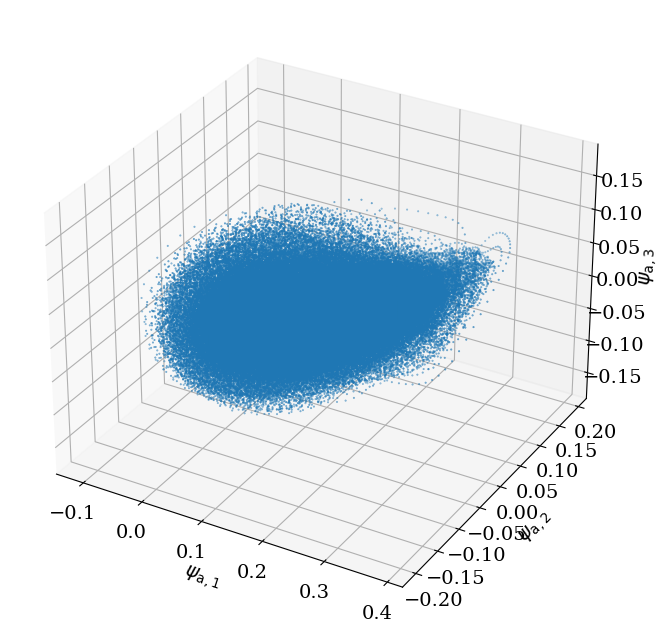

In [15]:
varx = 0
vary = 1
varz = 2

fig = plt.figure(figsize=(10, 8))
axi = fig.add_subplot(111, projection='3d')

axi.scatter(reference_traj[varx], reference_traj[vary], reference_traj[varz], s=0.2);

axi.set_xlabel('$'+model_parameters.latex_var_string[varx]+'$')
axi.set_ylabel('$'+model_parameters.latex_var_string[vary]+'$')
axi.set_zlabel('$'+model_parameters.latex_var_string[varz]+'$');

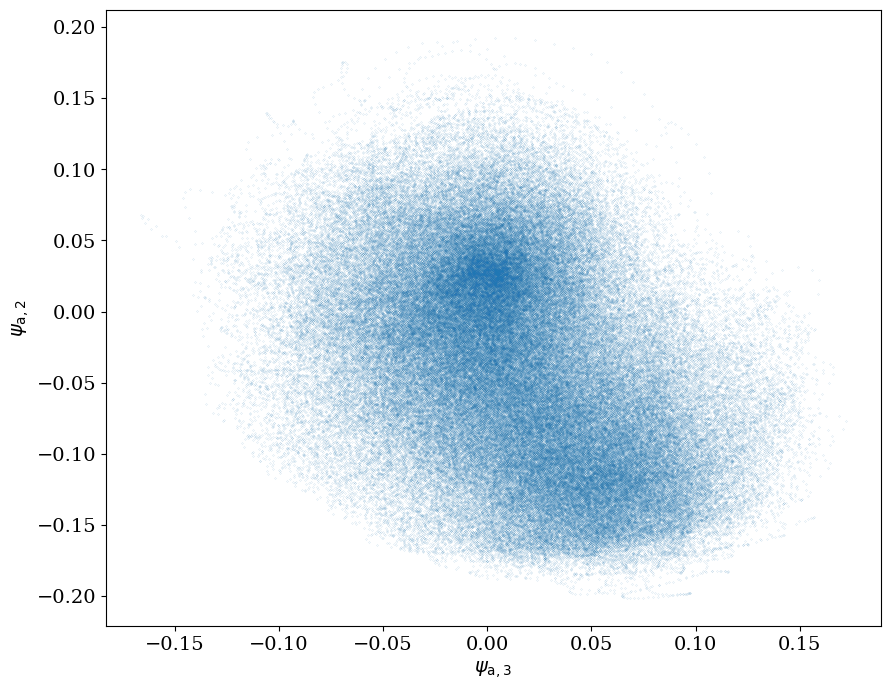

In [16]:
varx = 2
vary = 1
plt.figure(figsize=(10, 8))

plt.plot(reference_traj[varx], reference_traj[vary], marker='o', ms=0.07, ls='')

plt.xlabel('$'+model_parameters.latex_var_string[varx]+'$')
plt.ylabel('$'+model_parameters.latex_var_string[vary]+'$');

In [17]:
var = 1
plt.figure(figsize=(10, 8))

plt.plot(model_parameters.dimensional_time*reference_time, reference_traj[var])

plt.xlabel('time (days)')
plt.ylabel('$'+model_parameters.latex_var_string[var]+'$');

## Initial condition sensitivity analysis example

Instantiating a tangent linear integrator with the model tendencies

In [18]:
tgls_integrator = RungeKuttaTglsIntegrator()

In [19]:
tgls_integrator.set_func(f, Df)

Integrating with slightly perturbed initial conditions

In [20]:
tangent_ic = 0.0001*np.random.randn(number_of_perturbed_trajectories, model_parameters.ndim)

In [21]:
%%time 

tgls_integrator.integrate(0., 130., dt=dt, write_steps=write_steps, ic=ic, tg_ic=tangent_ic)

CPU times: user 5.76 ms, sys: 7.96 ms, total: 13.7 ms
Wall time: 5.92 s


Obtaining the perturbed trajectories

In [22]:
time, traj, delta = tgls_integrator.get_trajectories()

In [23]:
pert_traj = traj + delta

Trajectories plot

In [24]:
var = 10
plt.figure(figsize=(10, 8))

plt.plot(model_parameters.dimensional_time*time, traj[var])
plt.plot(model_parameters.dimensional_time*time, pert_traj[:,var].T, ls=':')

ax = plt.gca()

plt.xlabel('time (days)')
plt.ylabel('$'+model_parameters.latex_var_string[var]+'$');

Mean and standard deviation

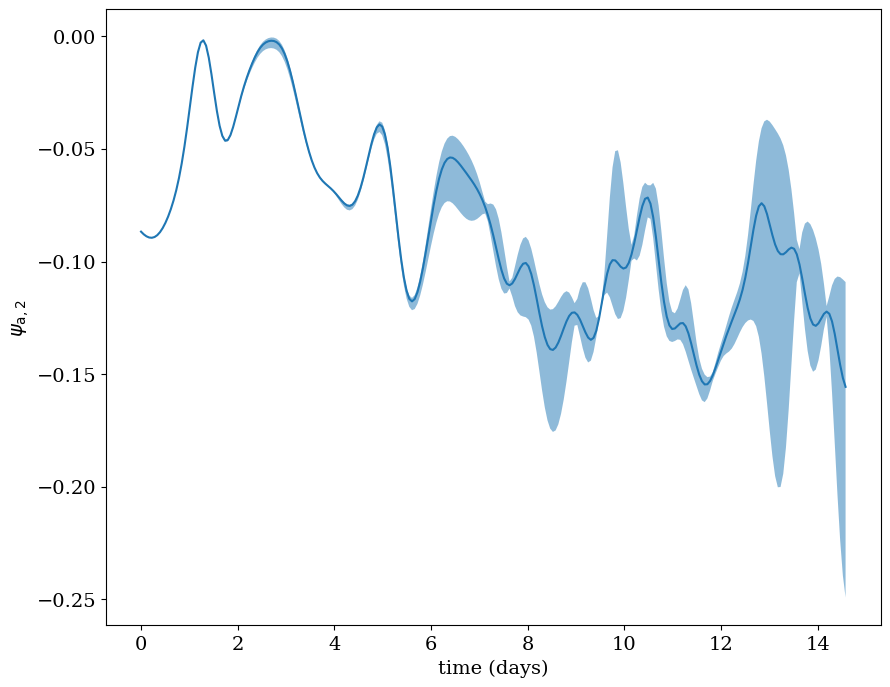

In [25]:
var = 1
plt.figure(figsize=(10, 8))

plt.plot(model_parameters.dimensional_time*time, traj[var])

ax = plt.gca()
std_plot(model_parameters.dimensional_time*time, np.mean(pert_traj[:,var], axis=0), np.sqrt(np.var(pert_traj[:, var], axis=0)), ax=ax, alpha=0.5)

plt.xlabel('time (days)')
plt.ylabel('$'+model_parameters.latex_var_string[var]+'$');

## Showing the resulting fields (animation)

This is an advanced feature showing the time evolution of diagnostic of the model. It shows simultaneously a scatter plot of the variable $\psi_2$ and $\psi_3$, and the geopotential height field at 500 hPa over the orographic height. Please read the documentation for more information.

Creating the diagnostics:

* For the 500hPa geopotential height:

In [26]:
psi = MiddleAtmosphericStreamfunctionDiagnostic(model_parameters, geopotential=True)

* For the nondimensional variables $\psi_2$ and $\psi_3$:

In [27]:
variable_nondim = VariablesDiagnostic([2, 1], model_parameters, False)

In [28]:
print(f"{reference_time = }, {len(reference_time) = }")

reference_time = array([0.00000e+00, 5.00000e-01, 1.00000e+00, ..., 9.99990e+04,
       9.99995e+04, 1.00000e+05]), len(reference_time) = 200001


In [29]:
# setting also the background
background = VariablesDiagnostic([2, 1], model_parameters, False)
background.set_data(reference_time, reference_traj)

Creating a multi diagnostic with both:

In [30]:
m = MultiDiagnostic(1,2)
m.add_diagnostic(variable_nondim,
                 diagnostic_kwargs={'show_time': False, 'background': background},
                 plot_kwargs={'ms': 0.2})
m.add_diagnostic(psi,
                 diagnostic_kwargs={'style': 'contour', 'contour_labels': False},
                 plot_kwargs={'colors': 'k'})
m.set_data(time, traj)

and show an interactive animation:

In [31]:
rc('font',**{'family':'serif','sans-serif':['Times'],'size':12})
m.animate(figsize=(20,6))

interactive(children=(IntSlider(value=130, description='time_index', max=260), Output()), _dom_classes=('widge…

or a movie:

(note this one takes quite some time to generate)

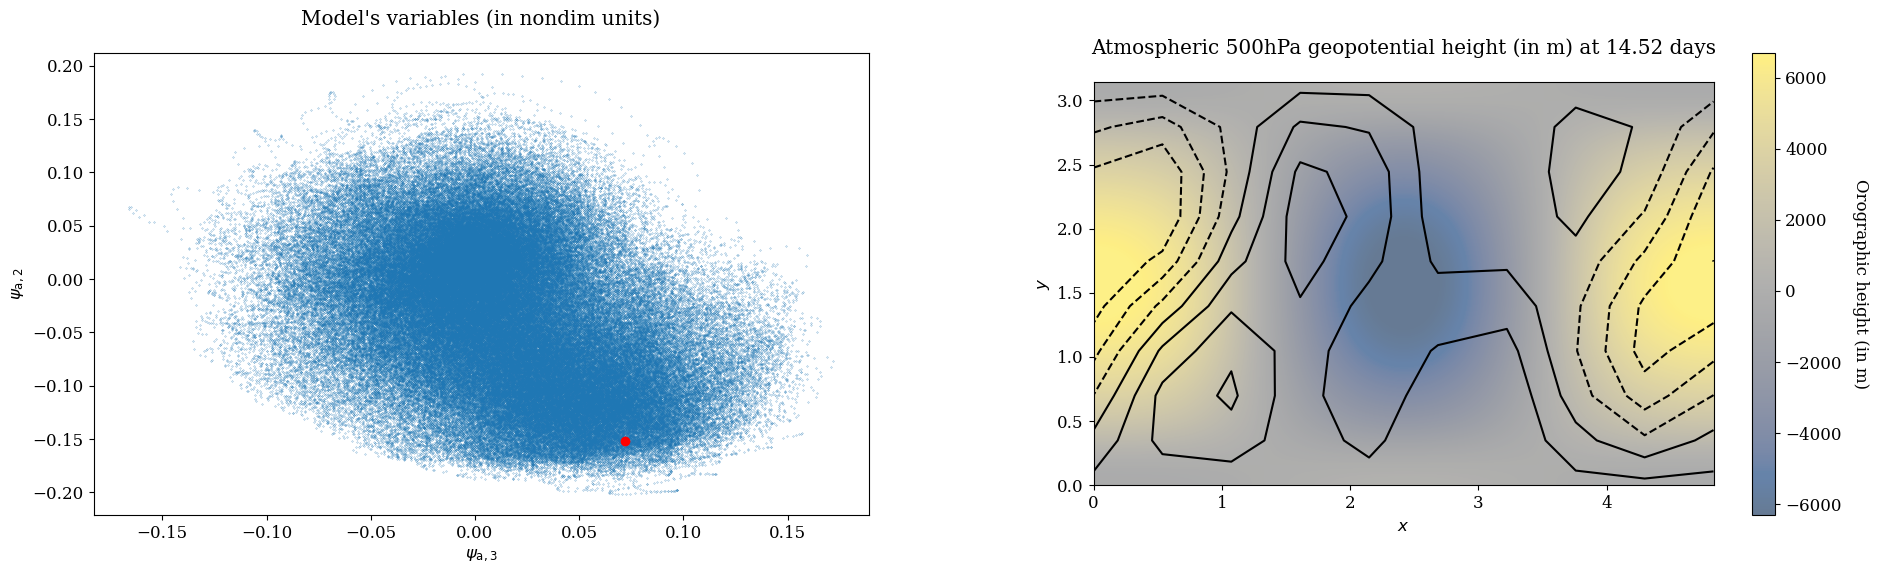

In [32]:
rc('font',**{'family': 'serif','sans-serif': ['Times'],'size': 12})
m.movie(figsize=(20,6), anim_kwargs={'interval': 100, 'frames': len(time)-1})